Loading data...
Training Linear Regression...
Training Decision Tree Regressor (max_depth=6)...
Training Decision Tree Regressor (max_depth=8)...
Training Decision Tree Regressor (max_depth=10)...
Training Decision Tree Regressor (max_depth=12)...
Training Decision Tree Regressor (max_depth=14)...
Results for all hotels:
                                    Model  Train R2  Train RMSE   Train MSE  \
0                       Linear Regression  0.977174   14.231314  202.530284   
1   Decision Tree Regressor (max_depth=6)  0.985939   11.169636  124.760763   
2   Decision Tree Regressor (max_depth=8)  0.997297    4.897027   23.980871   
3  Decision Tree Regressor (max_depth=10)  0.999614    1.851162    3.426800   
4  Decision Tree Regressor (max_depth=12)  0.999960    0.595521    0.354645   
5  Decision Tree Regressor (max_depth=14)  0.999998    0.134610    0.018120   

   Train MAE   Test R2  Test RMSE    Test MSE  Test MAE  Train Size  Test Size  
0   7.588595  0.980609  13.404186  179.672

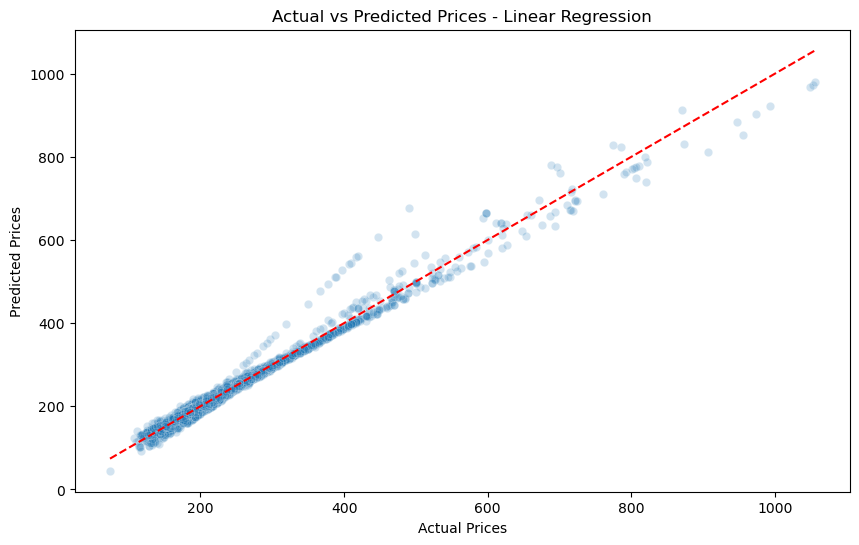

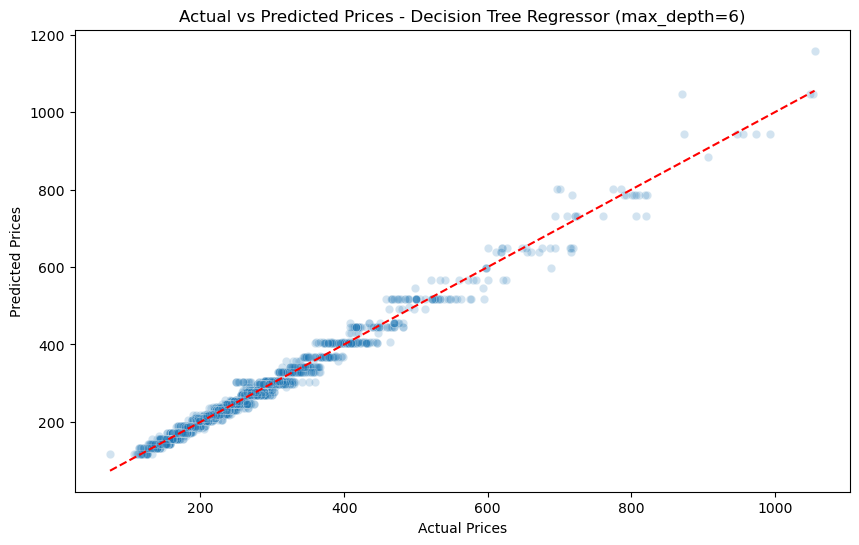

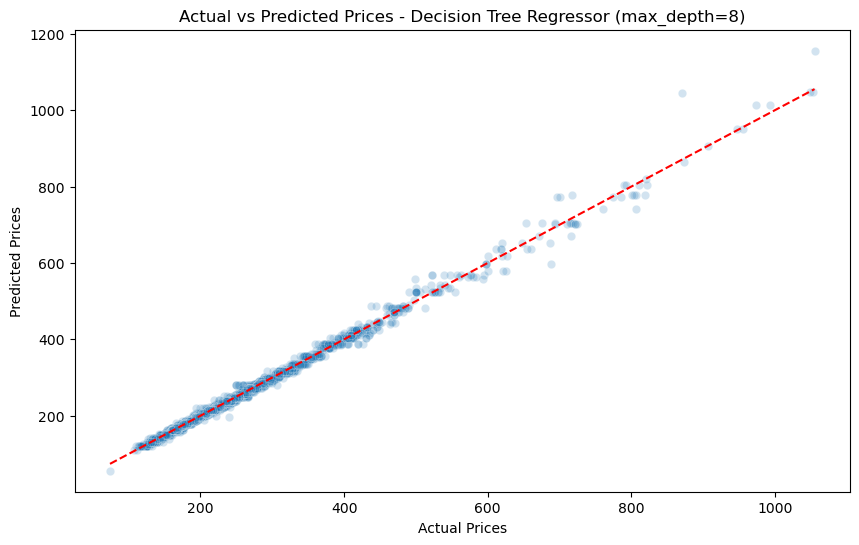

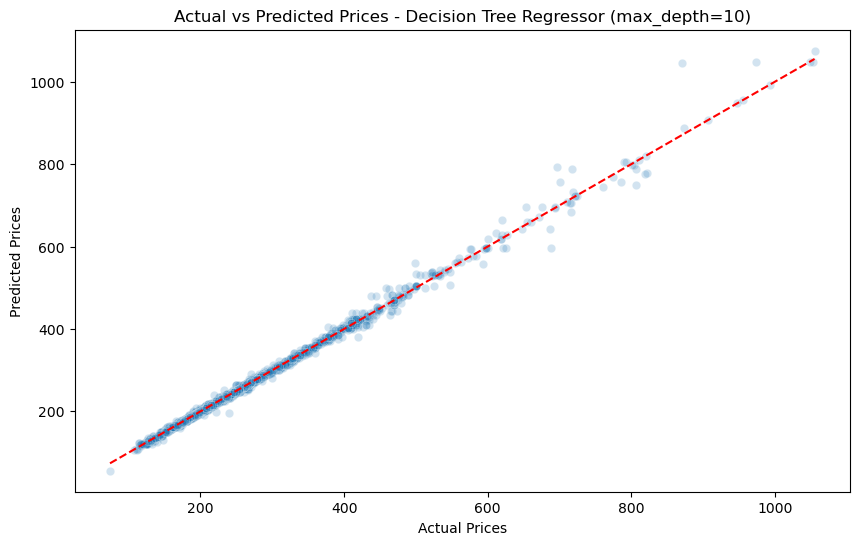

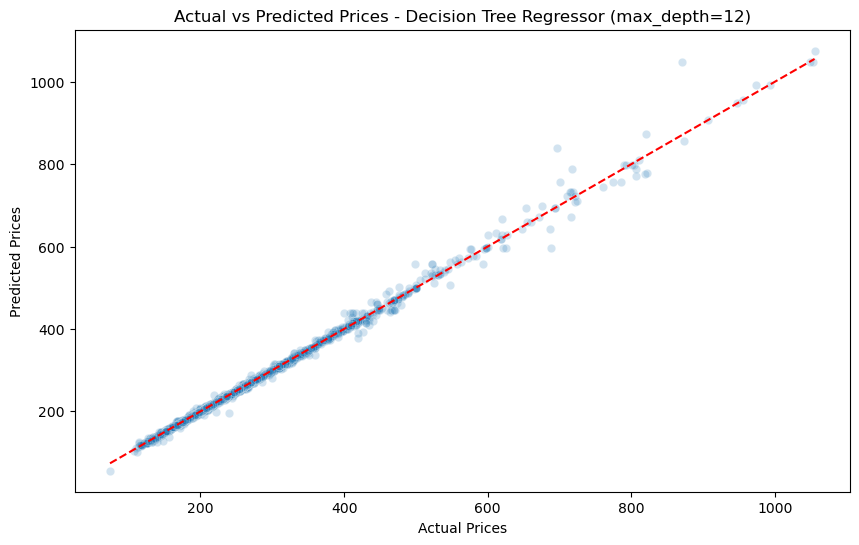

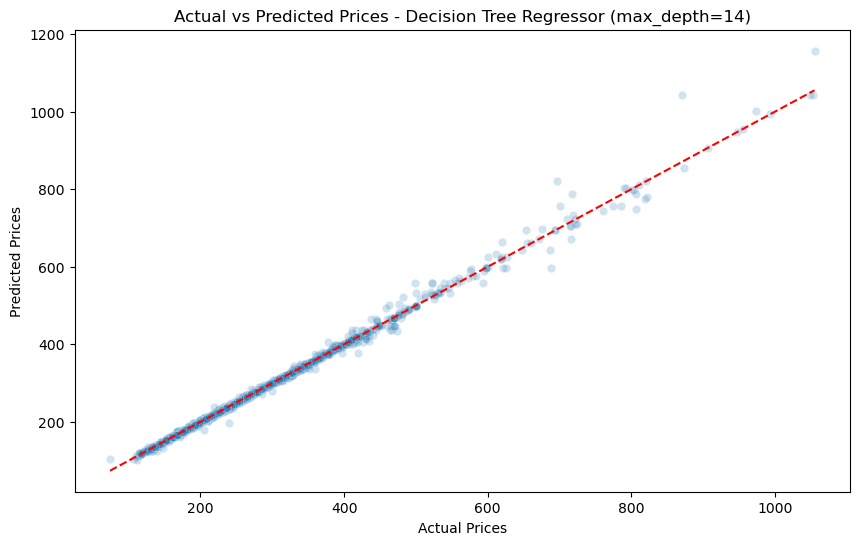

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")

# Load the data
df = pd.read_csv('last_output_df_25_06_2024.csv')





# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'Grade', 'Num of Reviews', 'Curr Price', 'Original Price', 'Percentage of discount', 'Distance from center', 'Location grade', 'Is refundable', 'Late payment', 'Breakfast included']
df = df[columns_to_use]

# Ensure 'Curr Price' is our target variable and exists in the dataframe

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Remove rows with infinity or very large values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=df.select_dtypes(include=[np.number]).columns, how='any', inplace=True)

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['Curr Price',])
y = df['Curr Price']

# Verify that X and y are not empty
if X.empty or y.empty:
    raise ValueError("Feature set or target set is empty after splitting.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor (max_depth=6)': DecisionTreeRegressor(max_depth=6),
    'Decision Tree Regressor (max_depth=8)': DecisionTreeRegressor(max_depth=8),
    'Decision Tree Regressor (max_depth=10)': DecisionTreeRegressor(max_depth=10),
    'Decision Tree Regressor (max_depth=12)': DecisionTreeRegressor(max_depth=12),
    'Decision Tree Regressor (max_depth=14)': DecisionTreeRegressor(max_depth=14)
}

results = []
predictions = {}

# Fit models and calculate metrics for both train and test sets
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    })
    
    # Store predictions for plotting
    predictions[name] = (y_test, y_test_pred)

results_df = pd.DataFrame(results)

# Display results
print("Results for all hotels:")
print(results_df)

# Plot actual vs predicted prices for each model
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()
